# Assignment 4

VADHRI VENKATA RATNAM

In [1]:
from numpy import pi
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_state_qsphere
from math import sqrt, pi
import numpy as np

In [2]:
%%html
<style>
    img {float:left}
</style>

## 1 Design a network consisting of conditional gate and two hadamard gates

There are the following three gates for construction. 

- A conditional $U_f$ gate with transformation function $|\phi \rangle = (-1)^y |\phi \rangle $
- Two Hadamard Gates

The objective is to find the vaue of y added by the $ U_f $ gate. 

### Multiple Qubits

Consider the following circuit. 

![Circuit](1.png)



$ T0 = |00 \rangle $

$ T1 = |0 \rangle \otimes H |0 \rangle $

$ \quad = \frac{1}{\sqrt2}|0 \rangle \otimes (|0 \rangle + |1 \rangle) $

$ \quad =  \frac{1}{\sqrt2} (|00 \rangle + |01 \rangle) $ 

$ T2 = U_f (T1) $

$ \quad = U_f \frac{1}{\sqrt2} (|00 \rangle + |01 \rangle) $

Conditional activation of $U_f$ => activates when Qubit 1 is 1

$ \quad =  \frac{1}{\sqrt2} (|00 \rangle + U_f|01 \rangle) $

$ \quad =  \frac{1}{\sqrt2} |0 \rangle \otimes (|0 \rangle + U_f|1 \rangle) $

$ \quad =  \frac{1}{\sqrt2} |0 \rangle \otimes (|0 \rangle + (-1)^y |1 \rangle) $

#### If y = 0 ( unknown bit inside the $ U_f $ gate ) 

$ T2 =  \frac{1}{\sqrt2} |0 \rangle \otimes (|0 \rangle + |1 \rangle) = |0+ \rangle $

Apply hadamard on Qubit 1. 

$ T3 = |0 \rangle H |+ \rangle = |00 \rangle $

#### Measurement on Qubit 1 gives 0 

#### If y = 1 ( unknown bit inside the $ U_f $ gate ) 

$ T2 =  \frac{1}{\sqrt2} |0 \rangle \otimes (|0 \rangle - |1 \rangle) = |0- \rangle $

Apply hadamard on Qubit 1. 

$ T3 = |0 \rangle H |- \rangle = |01 \rangle $

#### Measurement on Qubit 1 gives 1

### Single Qubit

![Circuit](10.png)


$ T0 = |0 \rangle $

$ T1 = H |0 \rangle $

$ \quad = \frac{1}{\sqrt2}(|0 \rangle + |1 \rangle) $

$ T2 = U_f (T1) $

$ \quad = U_f \frac{1}{\sqrt2} (|0 \rangle + |1 \rangle) $

Conditional activation of $U_f$ => activates when Qubit 1 is 1

$ \quad =  \frac{1}{\sqrt2} (|0 \rangle + U_f|1 \rangle) $

$ \quad =  \frac{1}{\sqrt2} (|0 \rangle + (-1)^y |1 \rangle) $

#### If y = 0 ( unknown bit inside the $ U_f $ gate ) 

$ T2 =  \frac{1}{\sqrt2} (|0 \rangle + |1 \rangle) = |+ \rangle $

Apply hadamard on Qubit 1. 

$ T3 = H |+ \rangle = |0 \rangle $

#### Measurement on Qubit 1 gives 0 

#### If y = 1 ( unknown bit inside the $ U_f $ gate ) 

$ T2 =  \frac{1}{\sqrt2} (|0 \rangle - |1 \rangle) = |- \rangle $

Apply hadamard on Qubit 1. 

$ T3 = H |- \rangle = |1 \rangle $

#### Measurement on Qubit 1 gives 1


## 2. Which single operator application will yield value of x.

Hardamard Gate

## 3. Proove the following

$ H^{\otimes n} |x \rangle_n = (-1)^{x.y} |y\rangle_n $

$ x.y = x_1y_1 \oplus x_2y_2 \oplus ... x_ny_n $

### Method 1

Single hadamard gate is reprsented as below.

$ H|x\rangle = \Sigma_y (-1)^{x.y} |y \rangle  $

For all values of x => 0,1,2...n

$ H^{\otimes n} |x \rangle_n = \Sigma_{y_1, y_2, y_3 .. y_n} (-1)^{x1.y1 \oplus x_2.y_2 .. \oplus x_n.y_n} |y_1 \rangle y_2 \rangle ... |y_n \rangle $

$ \quad =  \Sigma_{y} (-1)^{x.y} |y\rangle_n $

Hence proved that 

$ H^{\otimes n} |x \rangle_n = (-1)^{x.y} |y\rangle_n $

### Method 2

$ H|x\rangle = \Sigma_y (-1)^{x.y} |y \rangle  $

$ H^{\otimes n} |x \rangle_n  = H^{\otimes n} |x_1 \rangle |x_2 \rangle  .. |x_n \rangle = H|x_1 \rangle H|x_2 \rangle  .. H|x_n \rangle $

$\quad = \Sigma_{y_1} (-1)^{x_1.y_1} |y_1 \rangle \otimes \Sigma_{y_2} (-1)^{x_2.y_2} |y_2 \rangle ... \Sigma_{y_n} (-1)^{x_n.y_n} |y_n \rangle  $

$ \quad = \Sigma_{y_1, y_2, y_3 .. y_n} (-1)^{x1.y1 \oplus x_2.y_2 .. \oplus x_n.y_n} |y_1 \rangle y_2 \rangle ... |y_n \rangle $

$ \quad =  \Sigma_{y} (-1)^{x.y} |y\rangle_n $

Hence proved that 

$ H^{\otimes n} |x \rangle_n = (-1)^{x.y} |y\rangle_n $



# 4. Probability of detection of a balanced function. 

The probability of having a balanced function or const function is $\frac{1}{2}$

The minimum number of queries to make so that we have a 100% accurate answer is $ 2^{N/2} + 1 $

The probablity of error happens in the case where we have a balanced function and all the $2^{N/2}$ queries returned the same value (0 or 1). 

$ P(Error) = P(0)_1.P(0)_2 ... P(0)_K $

$ \quad = \frac{1}{2}.\frac{1}{2}......\frac{1}{2} {k times} $

$ \quad = \frac{1}{2^k} $

Probability of error is inversely proportional to the number of tries (k). 

Hence the larger the number of tries, the more the probability of detection of balanced function. 


# 5. Probability of getting y != a is 0.

The final state of the function is below.

Final state = $ \sum_{x,y \in \{0,1\}_n } (-1)^{f(x)+x.y} |y \rangle $

For a specific y, the probablity is the square of the term below

$ P(Y=y) = \begin{bmatrix}\sum_{x \in \{0,1\}_n } (-1)^{x.a+x.y} \end{bmatrix}^2 $

$ \quad = \begin{bmatrix}\sum_{x \in \{0,1\}_n } (-1)^{x.(a \oplus y)} \end{bmatrix}^2 $

$ \quad = \begin{bmatrix}\sum_{x \in \{0,1\}_n } (-1)^{x.(a \oplus y)}\end{bmatrix}^2 $

$ P(Y=y) = 1 $ if $a == y$ else 0


# 6. Execute Bernstein-Vazirani for f(x) = a.x with a = 100101 

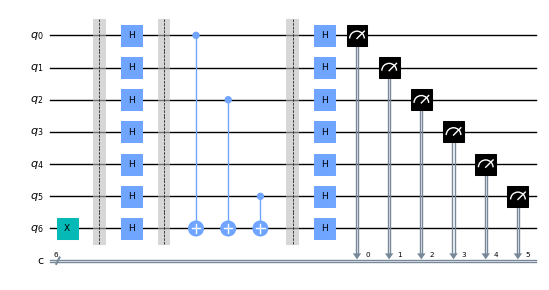

In [3]:
qreg_q = QuantumRegister(7, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[6])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[6])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6])
circuit.cx(qreg_q[0], qreg_q[6])
circuit.cx(qreg_q[2], qreg_q[6])
circuit.cx(qreg_q[5], qreg_q[6])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[6])

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])
circuit.measure(qreg_q[5], creg_c[5])

circuit.draw(output='mpl', scale=0.5)

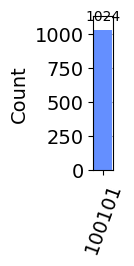

In [4]:
sim = Aer.get_backend('aer_simulator')

job = execute(circuit, sim)
result = job.result()

counts = result.get_counts()
plot_histogram(counts, figsize=(0.25,2))

# 7. Step by step: Bernstien vaziarni

### Method 1

we start with s = 0110

Step 1. Start with Hadamard gates applied to 4 Qubits. 5th Qubit used for gate calc.

$ |\psi_0 \rangle = H^{\otimes 4} | 0000 \rangle $ 

$ \quad = \frac{1}{\sqrt{2^n}} \begin{bmatrix} \Sigma_{x \in \{0,1\}^4} |x \rangle \end{bmatrix}$

Step 2. Apply $U_f$ gate for the Qubits.

$ \quad = \frac{1}{\sqrt{2^4}} \begin{bmatrix} \Sigma_{x \in \{0,1\}^4} (-1)^{f(x)} |x \rangle \end{bmatrix}$

Step 3. Apply Hadamard gate. 

$ \quad = H^{\otimes 4} \frac{1}{\sqrt{2^4}} \begin{bmatrix} \Sigma_{x \in \{0,1\}^4} (-1)^{f(x)} |x \rangle \end{bmatrix}$

$ \quad = \frac{1}{2^4} \begin{bmatrix} \Sigma_{x \in \{0,1\}^4} (-1)^{f(x)} \begin{bmatrix}\Sigma_{y \in \{0,1\}^4} (-1)^{x.y} |y \rangle \end{bmatrix} \end{bmatrix}$

$ \quad = \frac{1}{2^4} \begin{bmatrix} \Sigma_{x \in \{0,1\}^4} (-1)^{f(x)+x.y} |y \rangle \end{bmatrix}$

$ \quad = \frac{1}{2^4} \begin{bmatrix} \Sigma_{x \in \{0,1\}^4} (-1)^{s.x+x.y} |y \rangle \end{bmatrix}$

$ \quad = |0110 \rangle $

### Method 2

Step 1 : Init (0,1,2,3,4) qubits

$ |\psi \rangle_0= |10000\rangle $

Step 2: Apply Hadamard gates to all bits

$|\psi \rangle_1 = |-++++ \rangle $

Step 3: Apply CNOT gates as per secret message (0110) inside $U_f$

Due to phase kickback, $CNOT|+-\rangle$ becomes $CNOT|-- \rangle $

$ CNOT(3,0)|\psi \rangle_2 = |-++-+ \rangle $

$ CNOT(2,0)|\psi \rangle_3 = |-+--+ \rangle $

Step 4 : Apply Hadamard gates again.

$|\psi \rangle_4 = H|-+--+ \rangle $

$ \quad = |10110 \rangle $

If we drop the 0th bit and measure 1,2,3,4 they are the secret key. 


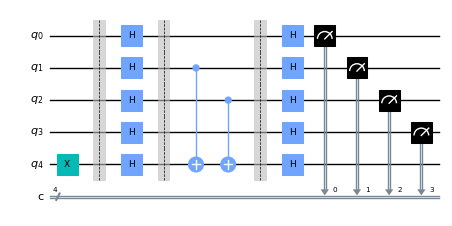

In [5]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[4])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[1], qreg_q[4])
circuit.cx(qreg_q[2], qreg_q[4])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])

circuit.draw(output='mpl', scale=0.5)

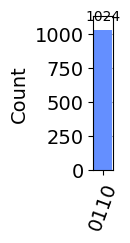

In [6]:
sim = Aer.get_backend('aer_simulator')

job = execute(circuit, sim)
result = job.result()

counts = result.get_counts()
plot_histogram(counts,figsize=(0.25,2))

# 8. Find new quantum state after applying QFT

#### (i) $ |\psi \rangle = \alpha |0\rangle + \beta |1\rangle $ 

$ QFT |\psi \rangle = \frac{1}{\sqrt2}\begin{bmatrix} 1&1\\1&-1 \end{bmatrix} \begin{bmatrix} \alpha\\\beta\end{bmatrix} $

$ \quad = \frac{1}{\sqrt2} \begin{bmatrix} \alpha+\beta\\\alpha-\beta\end{bmatrix}$

#### (ii) $ |\psi \rangle = \alpha |10\rangle $ 

$ |\psi \rangle = \frac{1}{\sqrt2} \begin{bmatrix} 0\\1 \end{bmatrix} \otimes \begin{bmatrix} 1\\0 \end{bmatrix} $

$ QFT |\psi \rangle = \frac{1}{2} \begin{bmatrix} 1&1&1&1\\1&i&-1&-i \\ 1&-1&1&-1 \\ 1&-i&-1&i\end{bmatrix} \begin{bmatrix} 0\\0\\1\\0 \end{bmatrix} = \frac{1}{2} \begin{bmatrix} 1\\-1\\1\\-1 \end{bmatrix} = \frac{1}{\sqrt2} \begin{bmatrix} 1\\1 \end{bmatrix} \otimes \frac{1}{\sqrt2}\begin{bmatrix} 1\\-1 \end{bmatrix} = |+- \rangle $

#### (iii)  $ |\psi \rangle = \frac{1}{\sqrt2} \begin{bmatrix}|10\rangle + |01\rangle \end{bmatrix}$ 

$ QFT |\psi \rangle = \frac{1}{2\sqrt2} \begin{bmatrix} 1&1&1&1\\1&i&-1&-i \\ 1&-1&1&-1 \\ 1&-i&-1&i\end{bmatrix} \begin{bmatrix} 0\\1\\1\\0 \end{bmatrix} = \frac{1}{2\sqrt2} \begin{bmatrix} 2\\i-1\\0\\-i-1 \end{bmatrix} $


# 9. Rotation gates in QFT.

The following is the circuit that can achieve quantum addition. If we need to add x to y, we can add that in the freq domain too. 

$ |x \rangle = \frac{1}{\sqrt{2^n}} \sum_{p} {e^{2\pi i \frac{xp}{2^n}}} |p \rangle $

Add y to the phase .. 

$ |x \rangle = \frac{1}{\sqrt{2^n}} \sum_{p} {e^{2\pi i \frac{x(p+y)}{2^n}}} |p \rangle $

Apply $ QFT^{-1} $ ... 

$ |x + y \quad \% 2^n \rangle $

![alt text](9.png "Title")



Y can take values raised to power of 2, with less gates. 

No of operations : $ y^{(2^n-1)} $

# 10. First stage of QPE

![alt text](10.jpeg "Title")
